In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('DiD_data.csv')
df = pd.DataFrame(data)

# rename columns
df.columns = ['Bank', 'Date', 'TAR', 'Affected_BHC', 'After_DFA', 'Profitability', 'Leverage_ratio', 'Total_assets', 'Non_performing_loan_ratio', 'Cost_income_ratio', 'Deposit_ratio', 'Real_estate_loan_ratio', 'Liquidity_ratio', 'CPP_recipient']

In [3]:
# Paul 
# calculating z-score: (ROA+CAR)/std(ROA) [CAR=Leverage ratio, ROA=Profitability]

# calculating stdROA
df['stdROA1'] = df[df['After_DFA'].eq(0)].groupby('Bank')['Profitability'].transform(np.std)
df['stdROA2'] = df[df['After_DFA'].eq(1)].groupby('Bank')['Profitability'].transform(np.std)
df['stdROA1'] = df['stdROA1'].fillna(0)
df['stdROA2'] = df['stdROA2'].fillna(0)
df['stdROA'] = (df['stdROA1'] - df['stdROA2']).abs()
df = df.drop(['stdROA1', 'stdROA2'], axis=1)

# drop banks with stdROA == 0
df = df[df['stdROA']!=0]
df=df.dropna()
df['zscore'] = np.log((df['Profitability']+df['Leverage_ratio'])/df['stdROA'])
df

/Users/jimmylin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Bank,Date,TAR,Affected_BHC,After_DFA,Profitability,Leverage_ratio,Total_assets,Non_performing_loan_ratio,Cost_income_ratio,Deposit_ratio,Real_estate_loan_ratio,Liquidity_ratio,CPP_recipient,stdROA,zscore
0,1020180,20040930,0.0,0,0,0.002772,0.081957,15.601202,0.013304,0.463811,0.561805,0.593738,0.024337,0,0.000395,5.368250
1,1020180,20041231,0.0,0,0,0.003045,0.082480,15.630583,0.009732,0.456392,0.557617,0.601763,0.025446,0,0.000395,5.377610
2,1020180,20050331,0.0,0,0,0.002616,0.082074,15.644925,0.011830,0.444011,0.556980,0.600700,0.025153,0,0.000395,5.367794
3,1020180,20050630,0.0,0,0,0.002647,0.081712,15.679702,0.013654,0.433771,0.571642,0.601042,0.023670,0,0.000395,5.363882
4,1020180,20050930,0.0,0,0,0.002867,0.082944,15.661868,0.012456,0.400985,0.577408,0.581438,0.029793,0,0.000395,5.380945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40020,3832583,20131231,0.0,0,1,0.004921,0.231972,13.475152,0.010622,0.554279,0.717567,0.001575,0.063039,0,0.001318,5.191553
40021,3832583,20140331,0.0,0,1,0.006362,0.225532,13.525286,0.008318,0.528542,0.720636,0.001986,0.081983,0,0.001318,5.170224
40022,3832583,20140630,0.0,0,1,0.006616,0.224154,13.519756,0.007821,0.490698,0.724049,0.002048,0.084540,0,0.001318,5.165368
40023,3832583,20140930,0.0,0,1,0.006579,0.226952,13.523643,0.008012,0.469434,0.716915,0.001870,0.075759,0,0.001318,5.177256


In [5]:
# establish top 10 BHCs
df_top10 = df.copy()
df_top10['trading_assets'] = df_top10['TAR'] * np.exp(df_top10['Total_assets'])
df_top10

,Bank,Date,TAR,Affected_BHC,After_DFA,Profitability,Leverage_ratio,Total_assets,Non_performing_loan_ratio,Cost_income_ratio,Deposit_ratio,Real_estate_loan_ratio,Liquidity_ratio,CPP_recipient,stdROA,zscore,trading_assets
0,1020180,20040930,0.0,0,0,0.002772,0.081957,15.601202,0.013304,0.463811,0.561805,0.593738,0.024337,0,0.000395,5.368250,0.0
1,1020180,20041231,0.0,0,0,0.003045,0.082480,15.630583,0.009732,0.456392,0.557617,0.601763,0.025446,0,0.000395,5.377610,0.0
2,1020180,20050331,0.0,0,0,0.002616,0.082074,15.644925,0.011830,0.444011,0.556980,0.600700,0.025153,0,0.000395,5.367794,0.0
3,1020180,20050630,0.0,0,0,0.002647,0.081712,15.679702,0.013654,0.433771,0.571642,0.601042,0.023670,0,0.000395,5.363882,0.0
4,1020180,20050930,0.0,0,0,0.002867,0.082944,15.661868,0.012456,0.400985,0.577408,0.581438,0.029793,0,0.000395,5.380945,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40020,3832583,20131231,0.0,0,1,0.004921,0.231972,13.475152,0.010622,0.554279,0.717567,0.001575,0.063039,0,0.001318,5.191553,0.0
40021,3832583,20140331,0.0,0,1,0.006362,0.225532,13.525286,0.008318,0.528542,0.720636,0.001986,0.081983,0,0.001318,5.170224,0.0
40022,3832583,20140630,0.0,0,1,0.006616,0.224154,13.519756,0.007821,0.490698,0.724049,0.002048,0.084540,0,0.001318,5.165368,0.0
40023,3832583,20140930,0.0,0,1,0.006579,0.226952,13.523643,0.008012,0.469434,0.716915,0.001870,0.075759,0,0.001318,5.177256,0.0


In [6]:
top10 = df_top10[df_top10['Affected_BHC'] == 1].groupby('Bank')['trading_assets'].mean()

In [7]:
top10 = top10.sort_values(ascending=False).head(10)
top10.index

Int64Index([1039502, 2380443, 1951350, 2162966, 1073757, 2816906, 1042351,
            2914521, 3232316, 3232325],
           dtype='int64', name='Bank')

In [8]:
dftop10 = df_top10[df_top10['Bank'].isin(top10.index)]
dftop10

,Bank,Date,TAR,Affected_BHC,After_DFA,Profitability,Leverage_ratio,Total_assets,Non_performing_loan_ratio,Cost_income_ratio,Deposit_ratio,Real_estate_loan_ratio,Liquidity_ratio,CPP_recipient,stdROA,zscore,trading_assets
1361,1039502,20040930,0.235039,1,0,0.001450,0.077595,20.852951,0.019520,0.559893,0.256591,0.354119,0.064694,0,0.000915,4.458329,2.675844e+08
1362,1039502,20041231,0.251247,1,0,0.001451,0.092131,20.869310,0.018247,0.539865,0.227403,0.360078,0.052704,0,0.000915,4.627153,2.907549e+08
1363,1039502,20050331,0.254006,1,0,0.001939,0.090340,20.887342,0.017743,0.498619,0.228123,0.361415,0.046781,0,0.000915,4.613123,2.992961e+08
1364,1039502,20050630,0.251873,1,0,0.000846,0.089686,20.881365,0.017612,0.581872,0.231952,0.377931,0.041456,0,0.000915,4.594017,2.950145e+08
1365,1039502,20050930,0.249962,1,0,0.002129,0.089087,20.908112,0.018822,0.447572,0.226194,0.380548,0.039657,0,0.000915,4.601536,3.007122e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38032,3232325,20040930,0.087236,1,0,0.001762,0.083743,19.569868,0.047637,0.377689,0.148597,0.607686,0.027683,0,0.000596,4.966702,2.752851e+07
38033,3232325,20050331,0.102051,1,0,0.003155,0.080864,19.676966,0.040210,0.342750,0.151610,0.605400,0.030996,0,0.000596,4.949159,3.584381e+07
38034,3232325,20050630,0.103564,1,0,0.002137,0.079888,19.735331,0.041571,0.339739,0.143461,0.598670,0.029474,0,0.000596,4.925153,3.856162e+07
38035,3232325,20050930,0.116463,1,0,0.001675,0.078360,19.795250,0.042745,0.307784,0.143941,0.592866,0.027050,0,0.000596,4.900588,4.604213e+07


In [9]:
# mean of the zscore of the top 10 group
top10plot = df_top10.groupby('Date')['zscore'].mean()

In [10]:
# mean of the zscore of the non top 10 group
df_nottop10 = df[~df['Bank'].isin(top10.index)]
df_nottop10 = df_nottop10[(df_nottop10['Affected_BHC']==1)]

abhc_plot = df_nottop10.groupby('Date')['zscore'].mean()

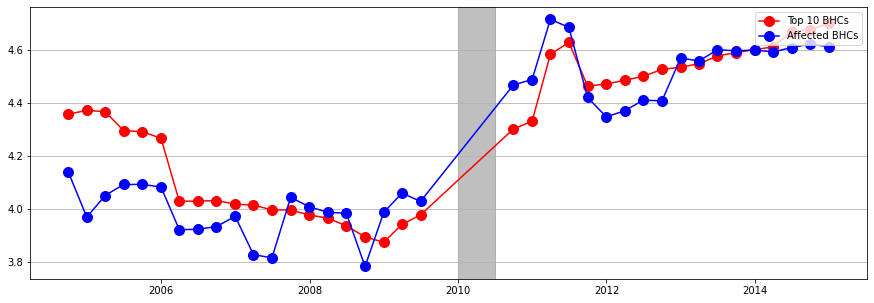

In [11]:
# plot graph
# DFA announced 20090930 to 20100630

x_top10 = pd.to_datetime(top10plot.index, format='%Y%m%d', errors='ignore')
x_nottop10 = pd.to_datetime(abhc_plot.index, format='%Y%m%d', errors='ignore')

plt.figure(figsize=(15,5))
plt.grid(axis = 'y')
plt.axvspan(pd.to_datetime('20091231', format='%Y%m%d'), pd.to_datetime('20100630', format='%Y%m%d'), color='grey', alpha=0.5)
plt.plot(x_top10,top10plot.values,'o-', color='red', markersize=10, label='Top 10 BHCs')
plt.plot(x_nottop10,abhc_plot.values,'o-', color='blue', markersize=10, label='Affected BHCs')
plt.legend(loc="upper right")

In [9]:
data = pd.read_csv('DiD_data.csv')
df_1 = pd.DataFrame(data)

# rename columns
df_1.columns = ['Bank', 'Date', 'TAR', 'Affected_BHC', 'After_DFA', 'Profitability', 'Leverage_ratio', 'Total_assets', 'Non_performing_loan_ratio', 'Cost_income_ratio', 'Deposit_ratio', 'Real_estate_loan_ratio', 'Liquidity_ratio', 'CPP_recipient']
# add variable Affect
df_1['Affect'] = (df_1['TAR'].mask(~df_1['After_DFA'].eq(0)).groupby(df_1['Bank']).transform('mean'))

In [10]:
# for each bank, first calculate standard deviation of profitability based on 10 quarter-period
# first split the original dataframe by different period

first_10 = [20040930, 20041231, 20050331, 20050630, 20050930, 20051231, 20060331, 20060630, 20060930, 20061231]
second_10 = [20070331, 20070630, 20070930, 20071231, 20080331, 20080630, 20080930, 20081231, 20090331, 20090630]
thrid_10 = [20100930, 20101231, 20110331, 20110630, 20110930, 20111231, 20120331, 20120630, 20120930, 20121231]
forth_10 = [20130331, 20130630, 20130930, 20131231, 20140331, 20140630, 20140930, 20141231, 20150331, 20150630]

df_zscore_1 = df_1.copy()
df_zscore_2 = df_1.copy()
df_zscore_3 = df_1.copy()
df_zscore_4 = df_1.copy()

df_zscore_1 = df_zscore_1[df_zscore_1['Date'].isin(first_10)]
df_zscore_2 = df_zscore_2[df_zscore_2['Date'].isin(second_10)]
df_zscore_3 = df_zscore_3[df_zscore_3['Date'].isin(thrid_10)]
df_zscore_4 = df_zscore_4[df_zscore_4['Date'].isin(forth_10)]

In [11]:
# group by bank_id to calculate the standard deviation of profitability
# and append the standard deviation back to the dataframe

def calculate_Profitability_std(dataframe):
    agg = dataframe.groupby(['Bank']).agg(np.std)['Profitability']
    dataframe['Profitability_std'] = 0

    for i, j in enumerate(dataframe['Bank']):
        for k, l in enumerate(agg.index):
            if j == l:
                dataframe.iloc[i,15] = agg.values[k]
    
    return dataframe

In [12]:
df_zscore_1 = calculate_Profitability_std(df_zscore_1)
df_zscore_2 = calculate_Profitability_std(df_zscore_2)
df_zscore_3 = calculate_Profitability_std(df_zscore_3)
df_zscore_4 = calculate_Profitability_std(df_zscore_4)

In [13]:
# merge dataframes into original one and calculate the z_score

df_zscore = pd.concat([df_zscore_1, df_zscore_2, df_zscore_3, df_zscore_4])
df_zscore['Profitability_std'] = df_zscore['Profitability_std'].fillna(0)

# drop banks with stdROA == 0
df_zscore = df_zscore[df_zscore['Profitability_std']!=0]
df_zscore = df_zscore.dropna()
df_zscore['z_score'] = (df_zscore['Profitability'] + df_zscore['Leverage_ratio']) / df_zscore['Profitability_std']

# transform z_score using ln

df_zscore['ln_z_score'] = np.log(df_zscore['z_score'])
df_zscore

/Users/jimmylin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Bank,Date,TAR,Affected_BHC,After_DFA,Profitability,Leverage_ratio,Total_assets,Non_performing_loan_ratio,Cost_income_ratio,Deposit_ratio,Real_estate_loan_ratio,Liquidity_ratio,CPP_recipient,Affect,Profitability_std,z_score,ln_z_score
0,1020180,20040930,0.0,0,0,0.002772,0.081957,15.601202,0.013304,0.463811,0.561805,0.593738,0.024337,0,0.0,0.000231,366.605276,5.904286
1,1020180,20041231,0.0,0,0,0.003045,0.082480,15.630583,0.009732,0.456392,0.557617,0.601763,0.025446,0,0.0,0.000231,370.052839,5.913646
2,1020180,20050331,0.0,0,0,0.002616,0.082074,15.644925,0.011830,0.444011,0.556980,0.600700,0.025153,0,0.0,0.000231,366.438160,5.903830
3,1020180,20050630,0.0,0,0,0.002647,0.081712,15.679702,0.013654,0.433771,0.571642,0.601042,0.023670,0,0.0,0.000231,365.007172,5.899917
4,1020180,20050930,0.0,0,0,0.002867,0.082944,15.661868,0.012456,0.400985,0.577408,0.581438,0.029793,0,0.0,0.000231,371.288925,5.916981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40020,3832583,20131231,0.0,0,1,0.004921,0.231972,13.475152,0.010622,0.554279,0.717567,0.001575,0.063039,0,0.0,0.000694,341.589362,5.833609
40021,3832583,20140331,0.0,0,1,0.006362,0.225532,13.525286,0.008318,0.528542,0.720636,0.001986,0.081983,0,0.0,0.000694,334.380965,5.812281
40022,3832583,20140630,0.0,0,1,0.006616,0.224154,13.519756,0.007821,0.490698,0.724049,0.002048,0.084540,0,0.0,0.000694,332.761131,5.807425
40023,3832583,20140930,0.0,0,1,0.006579,0.226952,13.523643,0.008012,0.469434,0.716915,0.001870,0.075759,0,0.0,0.000694,336.740611,5.819313


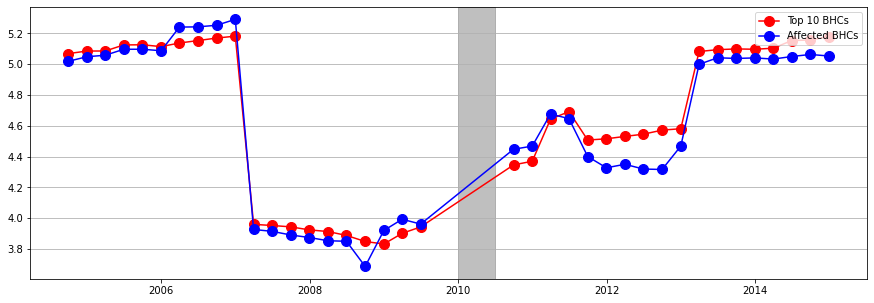

In [17]:
# establish top 10 BHCs
df_top10 = df_zscore.copy()
df_top10['trading_assets'] = df_top10['TAR'] * np.exp(df_top10['Total_assets'])
top10 = df_top10[df_top10['Affected_BHC'] == 1].groupby('Bank')['trading_assets'].mean()
top10 = top10.sort_values(ascending=False).head(10)
dftop10 = df_top10[df_top10['Bank'].isin(top10.index)]

# mean of the zscore of the top 10 group
top10plot = df_top10.groupby('Date')['ln_z_score'].mean()

# mean of the zscore of the non top 10 group
df_nottop10 = df_zscore[~df_zscore['Bank'].isin(top10.index)]
df_nottop10 = df_nottop10[(df_nottop10['Affected_BHC']==1)]

abhc_plot = df_nottop10.groupby('Date')['ln_z_score'].mean()

# plot graph
# DFA announced 20090930 to 20100630

x_top10 = pd.to_datetime(top10plot.index, format='%Y%m%d', errors='ignore')
x_nottop10 = pd.to_datetime(abhc_plot.index, format='%Y%m%d', errors='ignore')

plt.figure(figsize=(15,5))
plt.grid(axis = 'y')
plt.axvspan(pd.to_datetime('20091231', format='%Y%m%d'), pd.to_datetime('20100630', format='%Y%m%d'), color='grey', alpha=0.5)
plt.plot(x_top10,top10plot.values,'o-', color='red', markersize=10, label='Top 10 BHCs')
plt.plot(x_nottop10,abhc_plot.values,'o-', color='blue', markersize=10, label='Affected BHCs')
plt.legend(loc="upper right")